In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
df1 = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/Corr_Spic_UN_Scores.csv")

display(df1)

,InstanceID,InstanceID.1,CNN_Score,DF_Score
0,4,4,0.876645,0.680668
1,118,118,0.938690,0.929160
2,134,134,0.884858,0.708139
3,143,143,0.326836,0.241291
4,175,175,0.304596,0.102571
...,...,...,...,...
1327,40771,40771,0.354983,0.062641
1328,40780,40780,0.902747,0.679255
1329,40794,40794,0.953541,0.765392
1330,40801,40801,0.899225,0.749552


In [3]:
df1[['CNN_Score','DF_Score']].corr()

,CNN_Score,DF_Score
CNN_Score,1.000000,0.720115
DF_Score,0.720115,1.000000


array([[<AxesSubplot:xlabel='CNN_Score', ylabel='CNN_Score'>,
        <AxesSubplot:xlabel='DF_Score', ylabel='CNN_Score'>],
       [<AxesSubplot:xlabel='CNN_Score', ylabel='DF_Score'>,
        <AxesSubplot:xlabel='DF_Score', ylabel='DF_Score'>]], dtype=object)

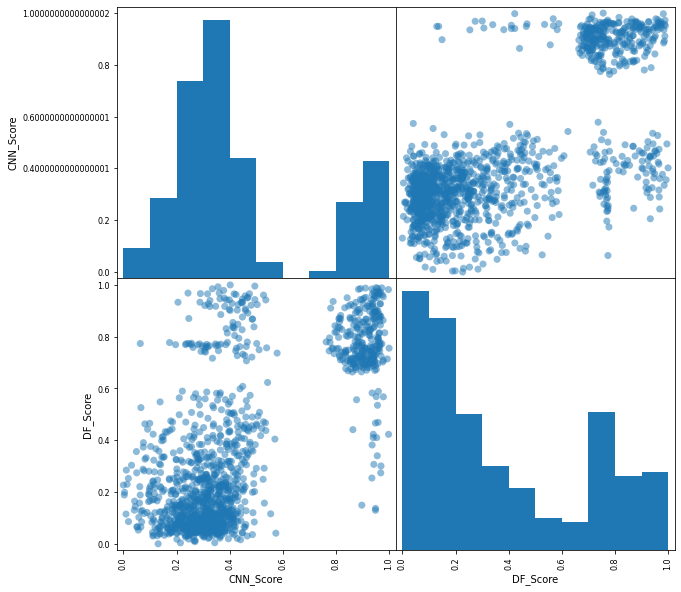

In [4]:
from pandas.plotting import scatter_matrix

scatter_matrix(df1[['CNN_Score','DF_Score']], figsize=(10,10), hist_kwds={'bins':10}, alpha=.5, marker='o', s=50)

Pearson correlation coefficient: 0.720
Samples are correlated (reject H0) p=0.000


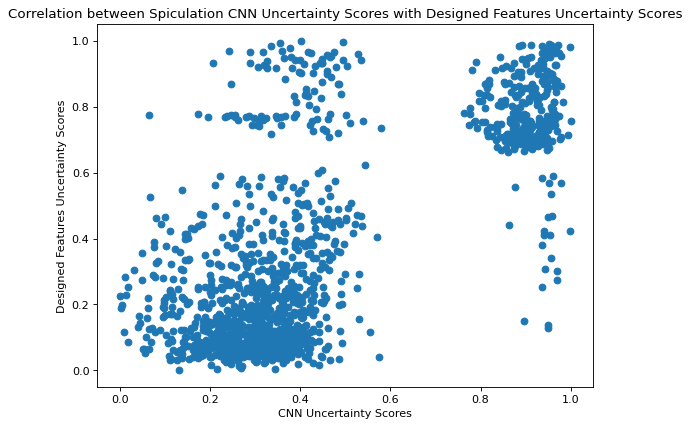

In [5]:
# calculate pearson's correlation
coef, p = pearsonr(df1['CNN_Score'], df1['DF_Score'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(df1['CNN_Score'], df1['DF_Score'])
pyplot.xlabel("CNN Uncertainty Scores")
pyplot.ylabel("Designed Features Uncertainty Scores")
pyplot.title("Correlation between Spiculation CNN Uncertainty Scores with Designed Features Uncertainty Scores")
pyplot.show()

In [6]:
# finding all CNN instances with uncertainty scores above.6
cnn_score_above_6 = df1.CNN_Score>=.6
print (cnn_score_above_6)
print ("\n")
print (df1[cnn_score_above_6])
print ("\n")
print (df1[cnn_score_above_6].InstanceID)

0        True
1        True
2        True
3       False
4       False
        ...  
1327    False
1328     True
1329     True
1330     True
1331    False
Name: CNN_Score, Length: 1332, dtype: bool


      InstanceID  InstanceID.1  CNN_Score  DF_Score
0              4             4   0.876645  0.680668
1            118           118   0.938690  0.929160
2            134           134   0.884858  0.708139
8            270           270   0.879485  0.724961
15           425           425   0.936954  0.876951
...          ...           ...        ...       ...
1318       40443         40443   0.871568  0.715027
1324       40684         40684   0.935967  0.697139
1328       40780         40780   0.902747  0.679255
1329       40794         40794   0.953541  0.765392
1330       40801         40801   0.899225  0.749552

[296 rows x 4 columns]


0           4
1         118
2         134
8         270
15        425
        ...  
1318    40443
1324    40684
1328    40780
1329    40794
1330    408

In [7]:
# finding all CNN instances with uncertainty scores above.6
df_score_above_6 = df1.DF_Score>=.6
print (df_score_above_6)
print ("\n")
print (df1[df_score_above_6])
print ("\n")
print (df1[df_score_above_6].InstanceID)

0        True
1        True
2        True
3       False
4       False
        ...  
1327    False
1328     True
1329     True
1330     True
1331    False
Name: DF_Score, Length: 1332, dtype: bool


      InstanceID  InstanceID.1  CNN_Score  DF_Score
0              4             4   0.876645  0.680668
1            118           118   0.938690  0.929160
2            134           134   0.884858  0.708139
8            270           270   0.879485  0.724961
15           425           425   0.936954  0.876951
...          ...           ...        ...       ...
1324       40684         40684   0.935967  0.697139
1326       40751         40751   0.246309  0.773938
1328       40780         40780   0.902747  0.679255
1329       40794         40794   0.953541  0.765392
1330       40801         40801   0.899225  0.749552

[378 rows x 4 columns]


0           4
1         118
2         134
8         270
15        425
        ...  
1324    40684
1326    40751
1328    40780
1329    40794
1330    4080

In [8]:
# Python program to illustrate the intersection
# of two lists in most simple way
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3
cnn_id = df1[cnn_score_above_6].InstanceID.tolist()
df_id = df1[df_score_above_6].InstanceID.tolist()
intersected = intersection(cnn_id, df_id)
print(len(intersected))

274


In [9]:
df2 = pd.DataFrame(intersected,columns =['InstanceID'])
df2

,InstanceID
0,4
1,118
2,134
3,270
4,425
...,...
269,40443
270,40684
271,40780
272,40794


In [10]:
df3 = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/DF_spic_max_scores_kmeans.csv")
IH = pd.merge(df2, df3)
display(IH)

,InstanceID,Score,Agreement,Spiculation,Two_Agreement
0,4,0.680668,Low Radiologist Agreement,2,Low_No
1,118,0.929160,All Radiologists Agree,0,Full_High
2,134,0.708139,Low Radiologist Agreement,2,Low_No
3,270,0.724961,High Radiologist Agreement,1,Full_High
4,425,0.876951,High Radiologist Agreement,0,Full_High
...,...,...,...,...,...
269,40443,0.715027,Low Radiologist Agreement,2,Low_No
270,40684,0.697139,No Radiologist Agreement,2,Low_No
271,40780,0.679255,Low Radiologist Agreement,2,Low_No
272,40794,0.765392,No Radiologist Agreement,2,Low_No


In [13]:
#np.savetxt("/Users/amalalmansour/Desktop/intersected_un_scores.csv", IH, fmt= "%s", delimiter=',')
intersected = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/spic_DF_CNN_intersected_un_scores.csv")
display(intersected)

,InstanceID,Score,Agreement,Spiculation
0,118,0.929160,All Radiologists Agree,0
1,270,0.724961,High Radiologist Agreement,1
2,425,0.876951,High Radiologist Agreement,0
3,536,0.870886,High Radiologist Agreement,0
4,599,0.807036,High Radiologist Agreement,0
...,...,...,...,...
269,40443,0.715027,Low Radiologist Agreement,2
270,40684,0.697139,No Radiologist Agreement,2
271,40780,0.679255,Low Radiologist Agreement,2
272,40794,0.765392,No Radiologist Agreement,2


In [14]:
groups = intersected.groupby('Agreement').count().reset_index()
groups

,Agreement,InstanceID,Score,Spiculation
0,All Radiologists Agree,31,31,31
1,High Radiologist Agreement,62,62,62
2,Low Radiologist Agreement,139,139,139
3,No Radiologist Agreement,42,42,42


In [15]:
ID = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/InstanceID_NoduleID.csv")
display(ID)

,InstanceID,noduleID
0,4,1
1,75,2
2,134,3
3,143,4
4,118,5
...,...,...
2683,35559,2688
2684,37212,2689
2685,37968,2690
2686,38686,2691


In [21]:
IH_spic = pd.read_csv("/Users/amalalmansour/Downloads/LIDC_Spiculation_IH.csv")
display(IH_spic)

,noduleID,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,...,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability,Spiculation_1,Spiculation_2,Spiculation_3,Spiculation_4,InstanceHardness
0,1,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,...,0.0223,661.0,143000,541000,0.0009,4,5,3,5,0.205
1,3,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,...,0.0247,416.0,111000,420000,0.0010,2,2,3,5,2.255
2,4,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,...,0.0107,420.0,98700,333000,0.0043,1,2,2,1,0.280
3,5,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,...,0.0392,565.0,137000,492000,0.0052,1,1,1,1,0.950
4,6,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,...,0.0097,403.0,200000,650000,0.0105,1,1,1,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2660,139,142,44.627417,44.019190,13.303394,14.966143,12.166835,1.230077,1.140194,...,0.0066,317.0,45300,148000,0.0041,1,2,1,1,0.225
825,2661,150,154,46.627417,45.380398,13.819766,15.587323,12.401289,1.256911,1.153404,...,0.0130,451.0,84900,296000,0.0039,1,4,2,1,0.495
826,2669,194,198,54.870058,52.785316,15.716503,19.272414,13.054298,1.476327,1.234978,...,0.0335,578.0,130000,486000,0.0060,1,2,1,1,0.635
827,2670,119,125,42.142136,41.031962,12.309163,12.708177,12.263728,1.036241,1.187617,...,0.0113,441.0,82700,275000,0.0074,2,2,3,5,1.250


In [22]:
IH_spic = IH_spic[["noduleID", "InstanceHardness"]]
display(IH_spic)

,noduleID,InstanceHardness
0,1,0.205
1,3,2.255
2,4,0.280
3,5,0.950
4,6,0.000
...,...,...
824,2660,0.225
825,2661,0.495
826,2669,0.635
827,2670,1.250


In [23]:
IH = pd.merge(IH_spic, ID)
display(IH)

,noduleID,InstanceHardness,InstanceID
0,1,0.205,4
1,3,2.255,134
2,4,0.280,143
3,5,0.950,118
4,6,0.000,175
...,...,...,...
824,2660,0.225,40860
825,2661,0.495,200
826,2669,0.635,3140
827,2670,1.250,6645


In [25]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [24]:
wmse= pd.merge(intersected, IH)
display(wmse)

,InstanceID,Score,Agreement,Spiculation,noduleID,InstanceHardness
0,118,0.929160,All Radiologists Agree,0,5,0.950
1,425,0.876951,High Radiologist Agreement,0,34,0.080
2,536,0.870886,High Radiologist Agreement,0,43,3.320
3,599,0.807036,High Radiologist Agreement,0,47,4.765
4,666,0.688060,High Radiologist Agreement,1,48,0.585
...,...,...,...,...,...,...
188,40145,0.685663,Low Radiologist Agreement,2,2621,4.835
189,40166,0.984348,Low Radiologist Agreement,2,2620,0.620
190,40780,0.679255,Low Radiologist Agreement,2,2657,4.675
191,40794,0.765392,No Radiologist Agreement,2,2656,0.720


In [30]:
wmse_lst = wmse.InstanceHardness.tolist()
normIH = NormalizeData(wmse_lst)
normIH

array([0.1110418 , 0.00249532, 0.40673737, 0.58702433, 0.06550218,
       0.14348097, 0.37367436, 0.07797879, 0.15408609, 0.29195259,
       0.06425452, 0.448534  , 0.55333749, 0.68059888, 0.36494074,
       0.21210231, 0.06113537, 0.8889582 , 0.31129133, 0.21334997,
       0.14472863, 0.84466625, 0.07673113, 0.10417966, 0.24766064,
       0.20960699, 0.172801  , 0.77854024, 0.0143481 , 0.30318153,
       0.53587024, 0.1378665 , 0.23767935, 0.05739239, 0.04678727,
       0.11915159, 0.205864  , 0.87336245, 0.29382408, 0.02121023,
       0.5102932 , 0.22083593, 0.4279476 , 0.07049283, 0.05177792,
       0.5782907 , 0.10106051, 0.49968808, 0.0205864 , 0.4279476 ,
       1.        , 0.90517779, 0.16593886, 0.28571429, 0.17716781,
       0.14160948, 0.20149719, 0.1378665 , 0.26200873, 0.58764816,
       0.39051778, 0.07485964, 0.92014972, 0.29507174, 0.04616344,
       0.08421709, 0.35371179, 0.02807236, 0.22333125, 0.47598253,
       0.10542732, 0.33998752, 0.22145976, 0.14036182, 0.13786

In [31]:
wmse['NormIH'] = normIH
display(wmse)

,InstanceID,Score,Agreement,Spiculation,noduleID,InstanceHardness,NormIH
0,118,0.929160,All Radiologists Agree,0,5,0.950,0.111042
1,425,0.876951,High Radiologist Agreement,0,34,0.080,0.002495
2,536,0.870886,High Radiologist Agreement,0,43,3.320,0.406737
3,599,0.807036,High Radiologist Agreement,0,47,4.765,0.587024
4,666,0.688060,High Radiologist Agreement,1,48,0.585,0.065502
...,...,...,...,...,...,...,...
188,40145,0.685663,Low Radiologist Agreement,2,2621,4.835,0.595758
189,40166,0.984348,Low Radiologist Agreement,2,2620,0.620,0.069869
190,40780,0.679255,Low Radiologist Agreement,2,2657,4.675,0.575795
191,40794,0.765392,No Radiologist Agreement,2,2656,0.720,0.082346


In [33]:
wmse[['Score','InstanceHardness']].corr()

,Score,InstanceHardness
Score,1.000000,-0.140919
InstanceHardness,-0.140919,1.000000


In [34]:
wmse[['Score','NormIH']].corr()

,Score,NormIH
Score,1.000000,-0.140919
NormIH,-0.140919,1.000000


Pearson correlation coefficient: -0.141
Samples are uncorrelated (fail to reject H0) p=0.051


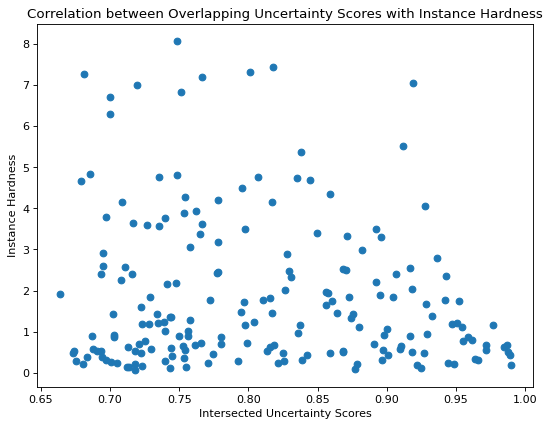

In [39]:
# calculate pearson's correlation
coef, p = pearsonr(wmse['Score'], wmse['InstanceHardness'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(wmse['Score'], wmse['InstanceHardness'])
pyplot.xlabel("Intersected Uncertainty Scores")
pyplot.ylabel("Instance Hardness")
pyplot.title("Correlation between Overlapping Uncertainty Scores with Instance Hardness")
pyplot.show()

In [5]:
#np.savetxt("/Users/amalalmansour/Downloads/IH_UnScores_Mal.csv", train_slices, fmt= "%s", delimiter=',')

In [6]:
DesignedF_Mal = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Malignancy/DF_mal_max_scores.csv")
display(DesignedF_Mal)

,InstanceID,Score,Agreement,Spiculation,Two_Agreement
0,4,0.711000,High Radiologist Agreement,1,Full_High
1,118,0.796948,No Radiologist Agreement,3,Low_No
2,134,0.746083,Low Radiologist Agreement,3,Low_No
3,143,0.645305,Low Radiologist Agreement,3,Low_No
4,175,0.602024,High Radiologist Agreement,0,Full_High
...,...,...,...,...,...
1327,40771,0.593644,Low Radiologist Agreement,3,Low_No
1328,40780,0.722667,High Radiologist Agreement,1,Full_High
1329,40794,0.962471,High Radiologist Agreement,1,Full_High
1330,40801,0.827742,Low Radiologist Agreement,3,Low_No


In [7]:
IH_DF = pd.merge(IH, DesignedF_Mal)
display(IH_DF)

,noduleID,InstanceHardness,InstanceID,Score,Agreement,Spiculation,Two_Agreement
0,1,0.000000,4,0.711000,High Radiologist Agreement,1,Full_High
1,3,0.270000,134,0.746083,Low Radiologist Agreement,3,Low_No
2,4,0.150000,143,0.645305,Low Radiologist Agreement,3,Low_No
3,5,0.445000,118,0.796948,No Radiologist Agreement,3,Low_No
4,6,0.105000,175,0.602024,High Radiologist Agreement,0,Full_High
...,...,...,...,...,...,...,...
1327,2670,1.880000,6645,0.626017,Low Radiologist Agreement,3,Low_No
1328,2673,0.508333,8814,0.630690,Low Radiologist Agreement,3,Low_No
1329,2677,0.466667,16479,0.598006,Low Radiologist Agreement,3,Low_No
1330,2688,0.175000,35559,0.588785,Low Radiologist Agreement,3,Low_No


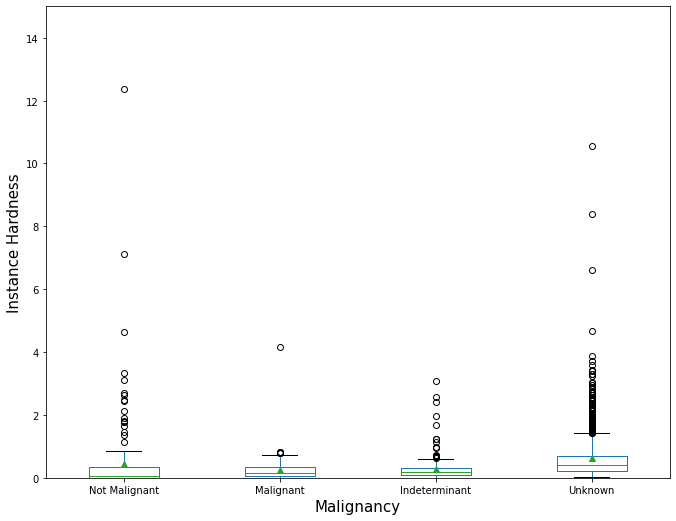

In [8]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

axes = IH_DF.boxplot(by='Spiculation',column =['InstanceHardness'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')
plt.ylim([0.0, 15.0])
plt.ylabel("Instance Hardness", fontdict={'fontsize':15})
plt.xlabel("Malignancy", fontdict={'fontsize':15})
plt.xticks([1, 2, 3,4], ['Not Malignant', 'Malignant','Indeterminant', 'Unknown'])
plt.show()

In [9]:
m1 = IH_DF.groupby(['Spiculation'])['InstanceHardness'].mean().values
print(m1)

[0.4455848  0.25993671 0.29576427 0.61704033]


In [10]:
m2 = IH_DF.groupby(['Spiculation'])['InstanceHardness'].median().values
print(m2)

[0.05  0.14  0.175 0.395]


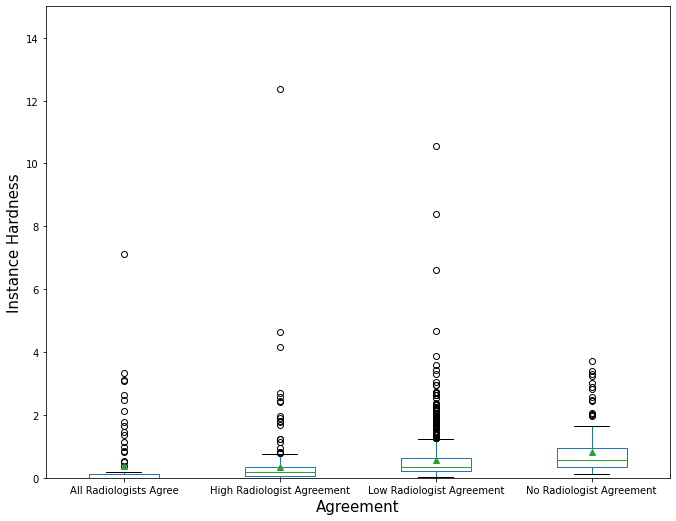

In [11]:
axes = IH_DF.boxplot(by='Agreement',column =['InstanceHardness'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')
plt.ylim([0.0, 15.0])
plt.ylabel("Instance Hardness", fontdict={'fontsize':15})
plt.xlabel("Agreement", fontdict={'fontsize':15})
#plt.xticks([1, 2, 3,4], ['Not Malignant', 'Malignant','Indeterminant', 'Unknown'])
plt.show()

In [12]:
m1 = IH_DF.groupby(['Agreement'])['InstanceHardness'].mean().values
print(m1)

[0.37979798 0.33934739 0.57825747 0.80516234]


In [13]:
m1 = IH_DF.groupby(['Agreement'])['InstanceHardness'].median().values
print(m1)

[0.         0.17       0.35833333 0.58      ]


([<matplotlib.axis.XTick at 0x16de12370>,
 [Text(1, 0, 'Not Malignant\nAll Radiologists Agree'),
  Text(2, 0, 'Not Malignant\nHigh Radiologist Agreement'),
  Text(3, 0, 'Malignant\nAll Radiologists Agree'),
  Text(4, 0, 'Malignant\nHigh Radiologist Agreement'),
  Text(5, 0, 'Indeterminant\nAll Radiologists Agree'),
  Text(6, 0, 'Indeterminant\nHigh Radiologist Agreement'),
  Text(7, 0, 'Unknown\nLow Radiologist Agreement'),
  Text(8, 0, 'Unknown\nNo Radiologist Agreement')])

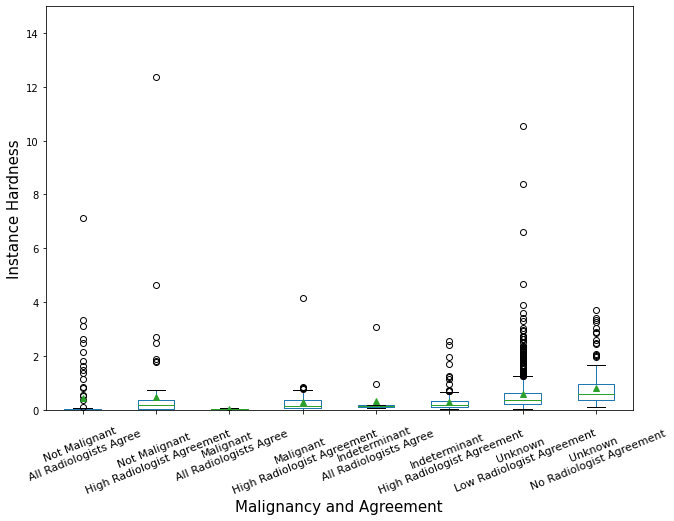

In [14]:
axes = IH_DF.boxplot(by=['Spiculation','Agreement'], column =['InstanceHardness'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')
plt.ylim([0.0, 15.0])
plt.ylabel("Instance Hardness",fontdict={'fontsize':15})
plt.xlabel("Malignancy and Agreement",fontdict={'fontsize':15})
plt.xticks([1, 2, 3, 4,5,6,7,8], ["Not Malignant\nAll Radiologists Agree", "Not Malignant\nHigh Radiologist Agreement", "Malignant\nAll Radiologists Agree", "Malignant\nHigh Radiologist Agreement", "Indeterminant\nAll Radiologists Agree", "Indeterminant\nHigh Radiologist Agreement", "Unknown\nLow Radiologist Agreement", "Unknown\nNo Radiologist Agreement"], rotation=22, fontsize=11)
#plt.xticks([1, 2, 3], ['Not Spiculated', 'Spiculated', 'Unknown'])

Pearson correlation coefficient: 0.100
Samples are correlated (reject H0) p=0.000


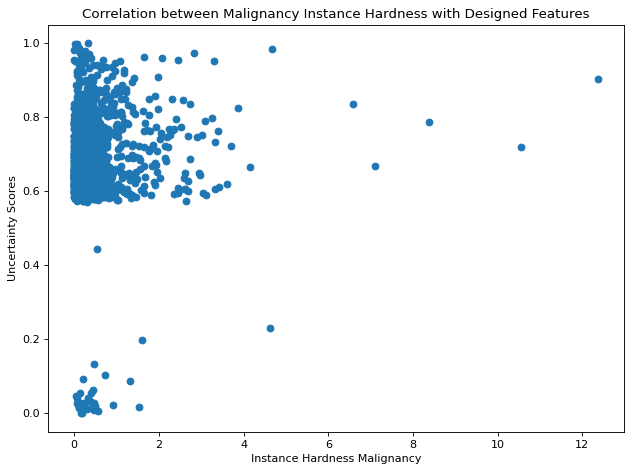

In [15]:
# calculate spearman's correlation
coef, p = pearsonr(IH_DF['InstanceHardness'], IH_DF['Score'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(IH_DF['InstanceHardness'], IH_DF['Score'])
pyplot.xlabel("Instance Hardness Malignancy")
pyplot.ylabel("Uncertainty Scores")
pyplot.title("Correlation between Malignancy Instance Hardness with Designed Features")
pyplot.show()

In [16]:
SCNN_Mal = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Malignancy/SCNN_Mal_max_scores.csv")
display(SCNN_Mal)

,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,4,0.123140,High Radiologist Agreement,1,1094,Full_High
1,118,0.957917,No Radiologist Agreement,3,246,Low_No
2,134,0.133511,Low Radiologist Agreement,3,931,Low_No
3,143,0.196145,Low Radiologist Agreement,3,161,Low_No
4,175,0.311393,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...
1327,40771,0.959346,Low Radiologist Agreement,3,73,Low_No
1328,40780,0.140127,High Radiologist Agreement,1,638,Full_High
1329,40794,0.052190,High Radiologist Agreement,1,437,Full_High
1330,40801,0.196220,Low Radiologist Agreement,3,657,Low_No


In [17]:
IH_SCNN = pd.merge(IH, SCNN_Mal)
display(IH_SCNN)

,noduleID,InstanceHardness,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,1,0.000000,4,0.123140,High Radiologist Agreement,1,1094,Full_High
1,3,0.270000,134,0.133511,Low Radiologist Agreement,3,931,Low_No
2,4,0.150000,143,0.196145,Low Radiologist Agreement,3,161,Low_No
3,5,0.445000,118,0.957917,No Radiologist Agreement,3,246,Low_No
4,6,0.105000,175,0.311393,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...,...,...
1327,2670,1.880000,6645,0.213829,Low Radiologist Agreement,3,119,Low_No
1328,2673,0.508333,8814,0.288772,Low Radiologist Agreement,3,44,Low_No
1329,2677,0.466667,16479,0.106596,Low Radiologist Agreement,3,76,Low_No
1330,2688,0.175000,35559,0.286986,Low Radiologist Agreement,3,57,Low_No


Pearson correlation coefficient: -0.014
Samples are uncorrelated (fail to reject H0) p=0.598


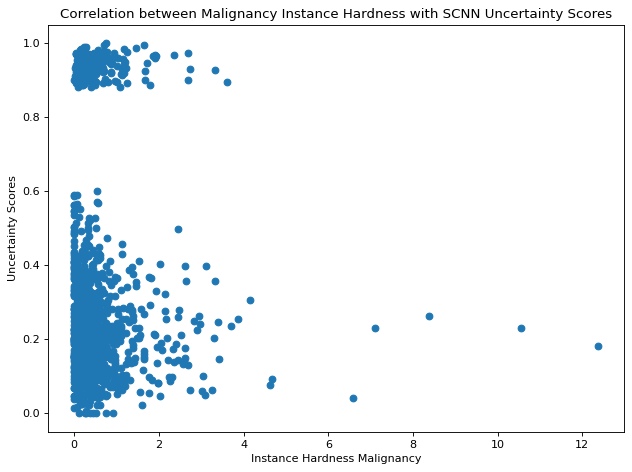

In [18]:
# calculate spearman's correlation
coef, p = pearsonr(IH_SCNN['InstanceHardness'], IH_SCNN['Score'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(IH_SCNN['InstanceHardness'], IH_SCNN['Score'])
pyplot.xlabel("Instance Hardness Malignancy")
pyplot.ylabel("Uncertainty Scores")
pyplot.title("Correlation between Malignancy Instance Hardness with SCNN Uncertainty Scores")
pyplot.show()

In [19]:
CNN_Mal = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Malignancy/CNN_Mal_max_scores.csv")
display(CNN_Mal)

,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,4,0.806248,High Radiologist Agreement,1,1094,Full_High
1,118,0.791210,No Radiologist Agreement,3,246,Low_No
2,134,0.783378,Low Radiologist Agreement,3,931,Low_No
3,143,0.790759,Low Radiologist Agreement,3,161,Low_No
4,175,0.806694,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...
1327,40771,0.777675,Low Radiologist Agreement,3,73,Low_No
1328,40780,0.781251,High Radiologist Agreement,1,638,Full_High
1329,40794,0.798648,High Radiologist Agreement,1,437,Full_High
1330,40801,0.800800,Low Radiologist Agreement,3,657,Low_No


In [20]:
IH_CNN = pd.merge(IH, CNN_Mal)
display(IH_CNN)

,noduleID,InstanceHardness,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,1,0.000000,4,0.806248,High Radiologist Agreement,1,1094,Full_High
1,3,0.270000,134,0.783378,Low Radiologist Agreement,3,931,Low_No
2,4,0.150000,143,0.790759,Low Radiologist Agreement,3,161,Low_No
3,5,0.445000,118,0.791210,No Radiologist Agreement,3,246,Low_No
4,6,0.105000,175,0.806694,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...,...,...
1327,2670,1.880000,6645,0.805058,Low Radiologist Agreement,3,119,Low_No
1328,2673,0.508333,8814,0.852187,Low Radiologist Agreement,3,44,Low_No
1329,2677,0.466667,16479,0.779432,Low Radiologist Agreement,3,76,Low_No
1330,2688,0.175000,35559,0.786210,Low Radiologist Agreement,3,57,Low_No


Pearson correlation coefficient: 0.009
Samples are uncorrelated (fail to reject H0) p=0.750


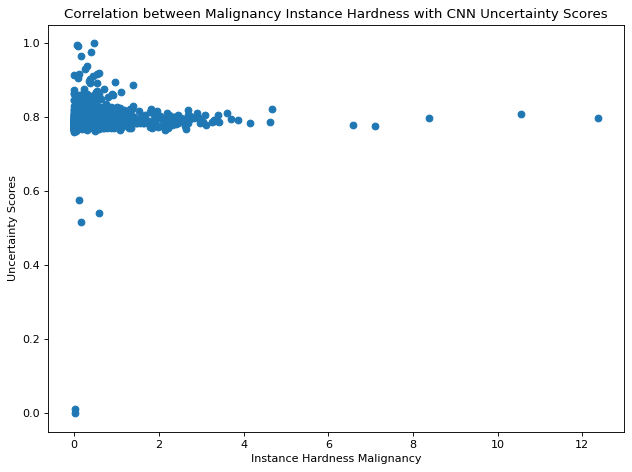

In [21]:
# calculate spearman's correlation
coef, p = pearsonr(IH_CNN['InstanceHardness'], IH_CNN['Score'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(IH_CNN['InstanceHardness'], IH_CNN['Score'])
pyplot.xlabel("Instance Hardness Malignancy")
pyplot.ylabel("Uncertainty Scores")
pyplot.title("Correlation between Malignancy Instance Hardness with CNN Uncertainty Scores")
pyplot.show()

In [22]:
SVAE_Mal = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Malignancy/SigmaVAE_Mal_max_scores.csv")
display(SVAE_Mal)

,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,4,0.398574,High Radiologist Agreement,1,1094,Full_High
1,118,0.409774,No Radiologist Agreement,3,246,Low_No
2,134,0.169054,Low Radiologist Agreement,3,931,Low_No
3,143,0.416591,Low Radiologist Agreement,3,161,Low_No
4,175,0.336372,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...
1327,40771,0.400656,Low Radiologist Agreement,3,73,Low_No
1328,40780,0.285902,High Radiologist Agreement,1,638,Full_High
1329,40794,0.555457,High Radiologist Agreement,1,437,Full_High
1330,40801,0.295406,Low Radiologist Agreement,3,657,Low_No


In [23]:
IH_SVAE = pd.merge(IH, SVAE_Mal)
display(IH_SVAE)

,noduleID,InstanceHardness,InstanceID,Score,Agreement,Spiculation,Size,Two_Agreement
0,1,0.000000,4,0.398574,High Radiologist Agreement,1,1094,Full_High
1,3,0.270000,134,0.169054,Low Radiologist Agreement,3,931,Low_No
2,4,0.150000,143,0.416591,Low Radiologist Agreement,3,161,Low_No
3,5,0.445000,118,0.409774,No Radiologist Agreement,3,246,Low_No
4,6,0.105000,175,0.336372,High Radiologist Agreement,0,71,Full_High
...,...,...,...,...,...,...,...,...
1327,2670,1.880000,6645,0.205732,Low Radiologist Agreement,3,119,Low_No
1328,2673,0.508333,8814,0.273802,Low Radiologist Agreement,3,44,Low_No
1329,2677,0.466667,16479,0.269151,Low Radiologist Agreement,3,76,Low_No
1330,2688,0.175000,35559,0.208855,Low Radiologist Agreement,3,57,Low_No


Pearson correlation coefficient: 0.106
Samples are correlated (reject H0) p=0.000


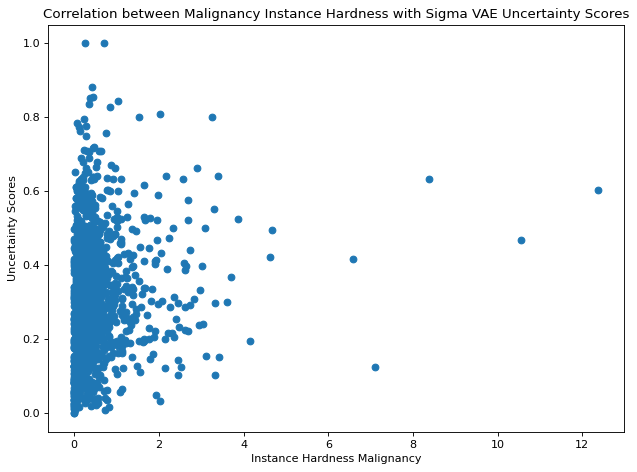

In [24]:
# calculate spearman's correlation
coef, p = pearsonr(IH_SVAE['InstanceHardness'], IH_SVAE['Score'])
print('Pearson correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

    
figure(figsize=(8, 6), dpi=80)
pyplot.scatter(IH_SVAE['InstanceHardness'], IH_SVAE['Score'])
pyplot.xlabel("Instance Hardness Malignancy")
pyplot.ylabel("Uncertainty Scores")
pyplot.title("Correlation between Malignancy Instance Hardness with Sigma VAE Uncertainty Scores")
pyplot.show()